In [49]:
import dask
import dask.dataframe as dd
from dask.distributed import LocalCluster

In [ ]:
cluster = LocalCluster()
client = cluster.get_client()

c:\Users\eigenaar\Documents\Data_mining\Data-Mining-For-The-Girls\.venv\Lib\site-packages\distributed\node.py:182: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 62906 instead
  warnings.warn(


2024-05-18 01:40:03,915 - distributed.scheduler - WARNING - Worker failed to heartbeat for 10887s; attempting restart: <WorkerState 'tcp://127.0.0.1:62926', name: 3, status: running, memory: 0, processing: 0>
2024-05-18 01:40:04,393 - distributed.scheduler - WARNING - Worker failed to heartbeat for 10887s; attempting restart: <WorkerState 'tcp://127.0.0.1:62927', name: 2, status: running, memory: 0, processing: 0>
2024-05-18 01:40:04,943 - distributed.scheduler - WARNING - Worker failed to heartbeat for 10887s; attempting restart: <WorkerState 'tcp://127.0.0.1:62932', name: 0, status: running, memory: 0, processing: 0>
2024-05-18 01:40:04,951 - distributed.scheduler - WARNING - Worker failed to heartbeat for 10887s; attempting restart: <WorkerState 'tcp://127.0.0.1:62935', name: 1, status: running, memory: 0, processing: 0>
2024-05-18 10:55:29,031 - distributed.scheduler - ERROR - Workers ['tcp://127.0.0.1:62926', 'tcp://127.0.0.1:62932', 'tcp://127.0.0.1:62927', 'tcp://127.0.0.1:62935

In [52]:
import numpy as np
import pandas as pd

In [53]:
train = pd.read_csv("data/train_small.csv")
test = pd.read_csv("data/test_small.csv")

print(train.shape)

(175827, 56)


In [54]:
import matplotlib.pyplot as plt
import seaborn as sns
import os

null_percent = train.isnull().mean()
columns_drop = null_percent[null_percent >= 0.5].index.tolist()
train = train.drop(columns= columns_drop)

train.shape

(175827, 28)

In [17]:
train.head(10)

,srch_id,date_time,site_id,visitor_location_country_id,prop_country_id,prop_id,prop_starrating,prop_review_score,prop_brand_bool,prop_location_score1,...,srch_length_of_stay,srch_booking_window,srch_adults_count,srch_children_count,srch_room_count,srch_saturday_night_bool,orig_destination_distance,random_bool,click_bool,booking_bool
0,29,2013-02-26 19:42:22,18,129,219,1722,3,4.0,0,5.72,...,6,144,5,0,1,0,3748.90,0,1,1
1,29,2013-02-26 19:42:22,18,129,219,3858,4,4.5,0,5.70,...,6,144,5,0,1,0,3747.89,0,0,0
2,29,2013-02-26 19:42:22,18,129,219,7523,4,0.0,1,5.82,...,6,144,5,0,1,0,3748.71,0,0,0
3,29,2013-02-26 19:42:22,18,129,219,7880,4,4.5,1,5.88,...,6,144,5,0,1,0,3748.29,0,0,0
4,29,2013-02-26 19:42:22,18,129,219,31336,4,4.0,1,5.52,...,6,144,5,0,1,0,3748.98,0,0,0
5,29,2013-02-26 19:42:22,18,129,219,32060,4,4.5,1,5.69,...,6,144,5,0,1,0,3747.88,0,0,0
6,29,2013-02-26 19:42:22,18,129,219,36871,4,4.0,1,5.78,...,6,144,5,0,1,0,3747.98,0,0,0
7,29,2013-02-26 19:42:22,18,129,219,62433,3,4.0,0,5.71,...,6,144,5,0,1,0,3748.40,0,0,0
8,29,2013-02-26 19:42:22,18,129,219,73452,3,3.5,1,3.14,...,6,144,5,0,1,0,3746.26,0,0,0
9,29,2013-02-26 19:42:22,18,129,219,78380,3,4.5,1,5.74,...,6,144,5,0,1,0,3747.94,0,0,0


In [58]:
# train['total_price_stay'] = train['price_usd'] * train['srch_length_of_stay']
train = train.drop(['year', 'month'], axis = 1)
train['avg_location_score'] = train[['prop_location_score1', 'prop_location_score2']].mean(axis=1)
train.head(10)

,srch_id,date_time,site_id,visitor_location_country_id,prop_country_id,prop_id,prop_starrating,prop_review_score,prop_brand_bool,prop_location_score1,...,srch_booking_window,srch_adults_count,srch_children_count,srch_room_count,srch_saturday_night_bool,orig_destination_distance,random_bool,click_bool,booking_bool,avg_location_score
0,29,2013-02-26 19:42:22,18,129,219,1722,3,4.0,0,5.72,...,144,5,0,1,0,3748.90,0,1,1,2.91680
1,29,2013-02-26 19:42:22,18,129,219,3858,4,4.5,0,5.70,...,144,5,0,1,0,3747.89,0,0,0,2.91480
2,29,2013-02-26 19:42:22,18,129,219,7523,4,0.0,1,5.82,...,144,5,0,1,0,3748.71,0,0,0,2.97255
3,29,2013-02-26 19:42:22,18,129,219,7880,4,4.5,1,5.88,...,144,5,0,1,0,3748.29,0,0,0,3.04660
4,29,2013-02-26 19:42:22,18,129,219,31336,4,4.0,1,5.52,...,144,5,0,1,0,3748.98,0,0,0,2.79790
5,29,2013-02-26 19:42:22,18,129,219,32060,4,4.5,1,5.69,...,144,5,0,1,0,3747.88,0,0,0,2.90700
6,29,2013-02-26 19:42:22,18,129,219,36871,4,4.0,1,5.78,...,144,5,0,1,0,3747.98,0,0,0,2.96300
7,29,2013-02-26 19:42:22,18,129,219,62433,3,4.0,0,5.71,...,144,5,0,1,0,3748.40,0,0,0,2.90720
8,29,2013-02-26 19:42:22,18,129,219,73452,3,3.5,1,3.14,...,144,5,0,1,0,3746.26,0,0,0,1.57035
9,29,2013-02-26 19:42:22,18,129,219,78380,3,4.5,1,5.74,...,144,5,0,1,0,3747.94,0,0,0,2.93850


In [61]:
train = train.drop(['prop_location_score1', 'prop_location_score2'],axis = 1)
train.head(10)

,srch_id,date_time,site_id,visitor_location_country_id,prop_country_id,prop_id,prop_starrating,prop_review_score,prop_brand_bool,prop_log_historical_price,...,srch_booking_window,srch_adults_count,srch_children_count,srch_room_count,srch_saturday_night_bool,orig_destination_distance,random_bool,click_bool,booking_bool,avg_location_score
0,29,2013-02-26 19:42:22,18,129,219,1722,3,4.0,0,5.81,...,144,5,0,1,0,3748.90,0,1,1,2.91680
1,29,2013-02-26 19:42:22,18,129,219,3858,4,4.5,0,5.91,...,144,5,0,1,0,3747.89,0,0,0,2.91480
2,29,2013-02-26 19:42:22,18,129,219,7523,4,0.0,1,5.82,...,144,5,0,1,0,3748.71,0,0,0,2.97255
3,29,2013-02-26 19:42:22,18,129,219,7880,4,4.5,1,6.21,...,144,5,0,1,0,3748.29,0,0,0,3.04660
4,29,2013-02-26 19:42:22,18,129,219,31336,4,4.0,1,5.96,...,144,5,0,1,0,3748.98,0,0,0,2.79790
5,29,2013-02-26 19:42:22,18,129,219,32060,4,4.5,1,5.89,...,144,5,0,1,0,3747.88,0,0,0,2.90700
6,29,2013-02-26 19:42:22,18,129,219,36871,4,4.0,1,6.11,...,144,5,0,1,0,3747.98,0,0,0,2.96300
7,29,2013-02-26 19:42:22,18,129,219,62433,3,4.0,0,5.76,...,144,5,0,1,0,3748.40,0,0,0,2.90720
8,29,2013-02-26 19:42:22,18,129,219,73452,3,3.5,1,5.49,...,144,5,0,1,0,3746.26,0,0,0,1.57035
9,29,2013-02-26 19:42:22,18,129,219,78380,3,4.5,1,6.21,...,144,5,0,1,0,3747.94,0,0,0,2.93850


In [62]:
train.columns

Index(['srch_id', 'date_time', 'site_id', 'visitor_location_country_id',
       'prop_country_id', 'prop_id', 'prop_starrating', 'prop_review_score',
       'prop_brand_bool', 'prop_log_historical_price', 'position', 'price_usd',
       'promotion_flag', 'srch_destination_id', 'srch_length_of_stay',
       'srch_booking_window', 'srch_adults_count', 'srch_children_count',
       'srch_room_count', 'srch_saturday_night_bool',
       'orig_destination_distance', 'random_bool', 'click_bool',
       'booking_bool', 'avg_location_score'],
      dtype='object')

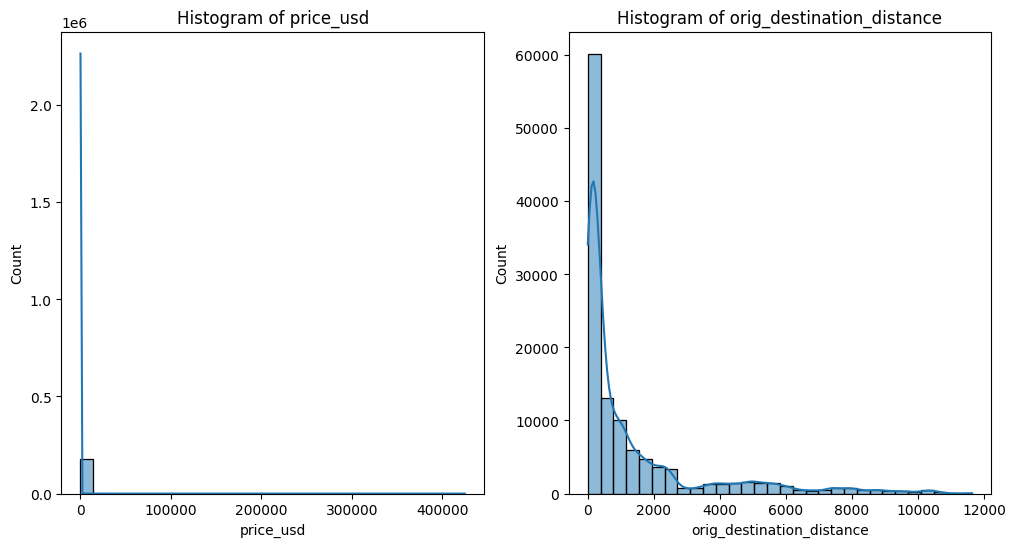

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(train['price_usd'], bins=30, kde=True)
plt.title('Histogram of price_usd')

plt.subplot(1, 2, 2)
sns.histplot(train['orig_destination_distance'], bins=30, kde=True)
plt.title('Histogram of orig_destination_distance')

plt.show()


In [64]:
from scipy.stats import skew

# Assuming 'df' is your DataFrame containing the dataset

# Compute skewness for 'price_usd' and 'orig_destination_distance'
skewness_price_usd = skew(train['price_usd'])
skewness_orig_destination_distance = skew(train['orig_destination_distance'])

print("Skewness of price_usd:", skewness_price_usd)
print("Skewness of orig_destination_distance:", skewness_orig_destination_distance)


Skewness of price_usd: 59.228813267026155
Skewness of orig_destination_distance: nan


In [68]:
# train['price_usd_log'] = np.log1p(train['price_usd'])  # Adding 1 to handle zero values
# print(train[['price_usd', 'price_usd_log']].head())

train['total_price_stay'] = train['price_usd'] * train['srch_length_of_stay']
train['total_price_stay_sqrt'] = np.sqrt(train['total_price_stay'])
print(train[['total_price_stay', 'total_price_stay_sqrt']].head())

   total_price_stay  total_price_stay_sqrt
0           1489.02              38.587822
1           4137.96              64.326977
2           3401.28              58.320494
3           3119.10              55.848903
4           2648.88              51.467271


In [71]:
# train = train.drop('total_price_stay', axis = 1)
train = train.drop('price_usd_sqrt', axis = 1)
train.columns

Index(['srch_id', 'date_time', 'site_id', 'visitor_location_country_id',
       'prop_country_id', 'prop_id', 'prop_starrating', 'prop_review_score',
       'prop_brand_bool', 'prop_log_historical_price', 'position', 'price_usd',
       'promotion_flag', 'srch_destination_id', 'srch_length_of_stay',
       'srch_booking_window', 'srch_adults_count', 'srch_children_count',
       'srch_room_count', 'srch_saturday_night_bool',
       'orig_destination_distance', 'random_bool', 'click_bool',
       'booking_bool', 'avg_location_score', 'total_price_stay_sqrt'],
      dtype='object')

In [73]:
train['family'] = (train['srch_children_count'] > 0).astype(int)  #0 is False and 1 is True
train.head()

,srch_id,date_time,site_id,visitor_location_country_id,prop_country_id,prop_id,prop_starrating,prop_review_score,prop_brand_bool,prop_log_historical_price,...,srch_children_count,srch_room_count,srch_saturday_night_bool,orig_destination_distance,random_bool,click_bool,booking_bool,avg_location_score,total_price_stay_sqrt,family
0,29,2013-02-26 19:42:22,18,129,219,1722,3,4.0,0,5.81,...,0,1,0,3748.90,0,1,1,2.91680,38.587822,0
1,29,2013-02-26 19:42:22,18,129,219,3858,4,4.5,0,5.91,...,0,1,0,3747.89,0,0,0,2.91480,64.326977,0
2,29,2013-02-26 19:42:22,18,129,219,7523,4,0.0,1,5.82,...,0,1,0,3748.71,0,0,0,2.97255,58.320494,0
3,29,2013-02-26 19:42:22,18,129,219,7880,4,4.5,1,6.21,...,0,1,0,3748.29,0,0,0,3.04660,55.848903,0
4,29,2013-02-26 19:42:22,18,129,219,31336,4,4.0,1,5.96,...,0,1,0,3748.98,0,0,0,2.79790,51.467271,0


In [79]:
from sklearn.preprocessing import StandardScaler

# List of numerical features to scale
num_features = ['prop_review_score', 'total_price_stay_sqrt']

# Initialize scaler
scaler = StandardScaler()

# Fit and transform training data
train[num_features] = scaler.fit_transform(train[num_features])

print()
